Covariance matrix 

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


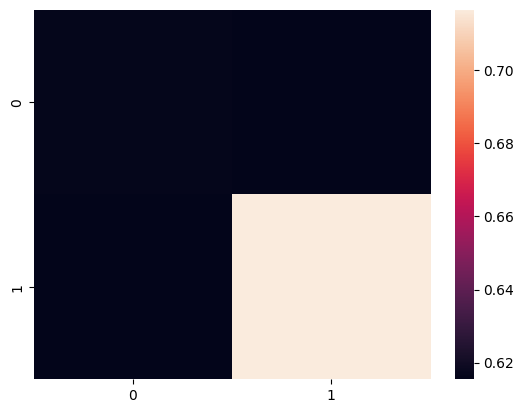

In [ ]:
import numpy as np
X = np.array([
    [2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1],
    [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
])

X= X.T # Transposing X to have observations as rows and features as columns

# Standardizing the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

#Calculate the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print ("Covariance matrix \n")
print(cov_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cov_matrix)
plt.show()


In [ ]:

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print("Eigen Value ",eigenvalues)
print("Eigen Vector\n", eigenvectors)


Eigen Value  [1.28402771 0.0490834 ]
Eigen Vector
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


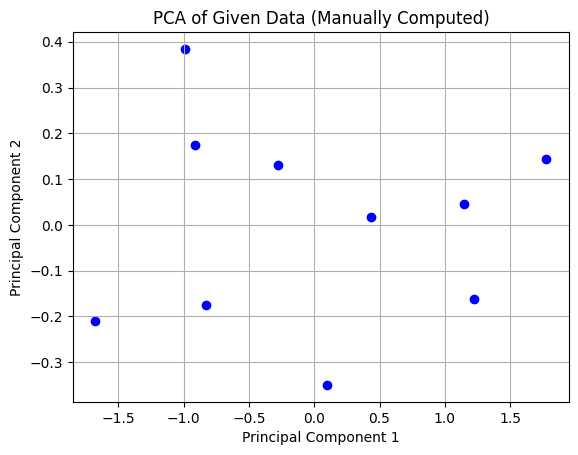

In [ ]:

# Project the data onto the principal components (eigenvectors)
X_pca_manual = np.dot(X_centered, eigenvectors)

plt.scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], color='blue')
plt.title('PCA of Given Data (Manually Computed)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

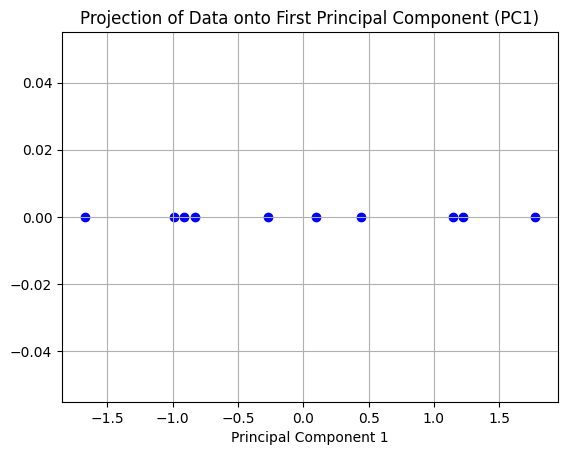

In [ ]:
# Projecting the data onto the first principal component (PC1)
X_pc1_manual = np.dot(X_centered, eigenvectors[:, 0].reshape(-1, 1))

# Display the projection onto PC1
plt.scatter(X_pc1_manual, np.zeros_like(X_pc1_manual), color='blue')
plt.title('Projection of Data onto First Principal Component (PC1)')
plt.xlabel('Principal Component 1')
plt.grid(True)
plt.show()



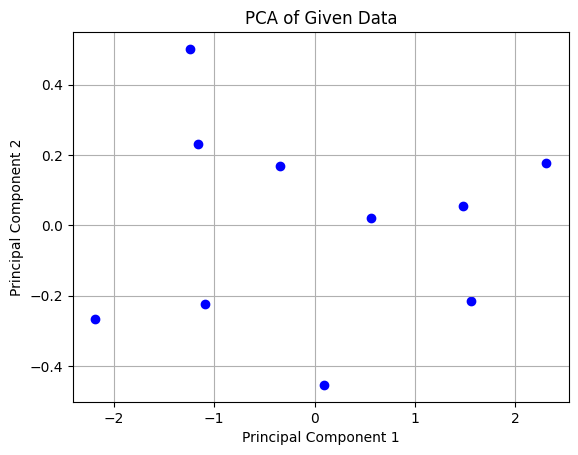

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = np.array([
    [2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1],
    [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
])
# Transposing X to have observations as rows and features as columns
X = X.T

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue')
plt.title('PCA of Given Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


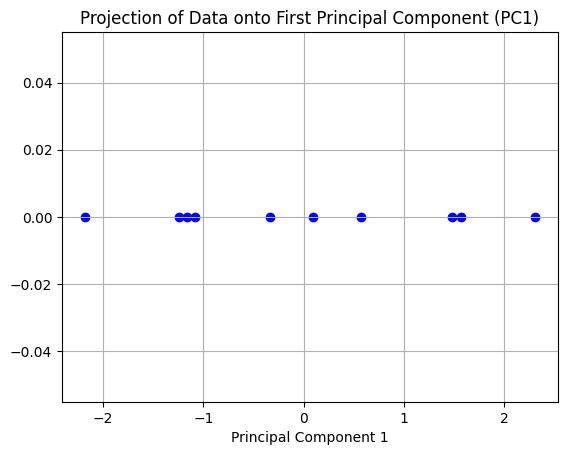

In [ ]:
from sklearn.decomposition import PCA
X = np.array([
    [2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1],
    [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
])
# Transposing X
X = X.T

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  reduce dimensionality to 1 components
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Display the projection onto PC1
plt.scatter(X_pca, np.zeros_like(X_pca), color='blue')
plt.title('Projection of Data onto First Principal Component (PC1)')
plt.xlabel('Principal Component 1')
plt.grid(True)
plt.show()



Lets see the PCA usage





  * **Income → Household income (₹ in lakhs per year)**
  * **AveRooms → Average size of the rented house (rooms)**
* We can **create a “Rent (₹/month)” column** by making it depend on both features:

  $$
  \text{Rent} = \alpha \times \text{Income} + \beta \times \text{Rooms} + \text{noise}
  $$

  e.g. `Rent ≈ 3000 × Income + 2000 × Rooms + noise`, in rupees

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

#  Data generation
rng = np.random.default_rng(42)
n = 200

Income = rng.normal(8, 3, n).clip(2, 20)             # Lakh/year
Rooms  = 2 + 0.25 * Income + rng.normal(0, 0.7, n)
Rooms  = Rooms.clip(2, 6)

Rent = 3000 * Income + 2000 * Rooms + rng.normal(0, 5000, n)

df_chd = pd.DataFrame({
    "Income_Lakh": Income,
    "Rooms": Rooms,
    "Rent_Rs": Rent.astype(int)
})
df_chd


,Income_Lakh,Rooms,Rent_Rs
0,8.914151,4.464840,34774
1,4.880048,4.205249,24034
2,10.251354,4.626248,44109
3,10.821694,5.156181,40808
4,2.146894,2.000000,13046
...,...,...,...
195,5.315819,3.425724,20680
196,9.929980,5.014588,37216
197,6.816185,3.864494,32240
198,7.984634,4.367204,33896


Original Chandigarh Rent Data (first 12 rows):
 Income_Lakh    Rooms  Rent_Rs
    8.914151 4.464840    34774
    4.880048 4.205249    24034
   10.251354 4.626248    44109
   10.821694 5.156181    40808
    2.146894 2.000000    13046
    4.093461 2.989262    16929
    8.383521 3.505619    31574
    7.051272 2.909649    31120
    7.949597 3.372692    20628
    5.440868 3.126331    16092
   10.638194 5.300680    35105
   10.333376 3.654869    26641


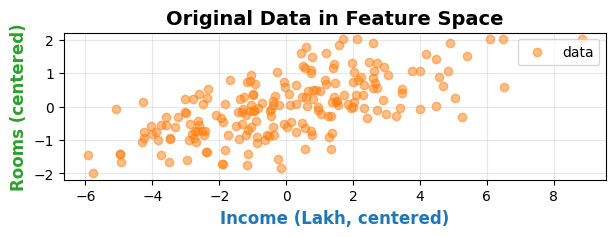

In [ ]:
#  PCA on [Income, Rooms]
X = df_chd[["Income_Lakh", "Rooms"]].values
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean

cov = np.cov(X_centered, rowvar=False)
eigvals, eigvecs = eig(cov)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx].real
eigvecs = eigvecs[:, idx].real
explained_var_ratio = eigvals / eigvals.sum()

# Scores in PC space
Z = X_centered @ eigvecs

# Convenience: unit vectors and projections
u1, u2 = eigvecs[:, 0], eigvecs[:, 1]
scores_pc1 = X_centered @ u1
X_proj_pc1 = np.outer(scores_pc1, u1)  # projected points onto PC1 (original space)

# Color
c_data   = "#ff7f0e"  # orange
c_inc    = "#1f77b4"  # blue for Income axis
c_room   = "#2ca02c"  # green for Rooms axis
c_pc1    = "#d62728"  # red for PC1
c_pc2    = "#9467bd"  # purple for PC2
c_proj   = "#7f7f7f"  # gray for projection lines

# Show original data preview
print("Original Chandigarh Rent Data (first 12 rows):")
print(df_chd.head(12).to_string(index=False))

# Utility: arrow with label
def draw_arrow(ax, start, vec, color, label, text_offset=(0.1, 0.1)):
    ax.arrow(start[0], start[1], vec[0], vec[1],
             head_width=0.15, length_includes_head=True, color=color)
    ax.text(start[0] + vec[0] + text_offset[0],
            start[1] + vec[1] + text_offset[1],
            label, color=color, fontsize=11, weight="bold")

# ---------- Step 1: Original data only ----------
plt.figure(figsize=(7, 7))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label="data", color=c_data)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel("Income (Lakh, centered)", color=c_inc, fontsize=12, weight="bold")
plt.ylabel("Rooms (centered)", color=c_room, fontsize=12, weight="bold")
plt.title("Original Data in Feature Space", fontsize=14, weight="bold")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


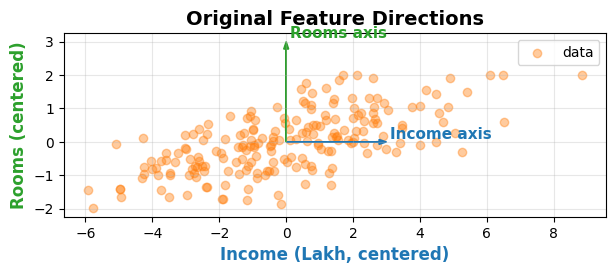

In [ ]:

# original feature directions
plt.figure(figsize=(7, 7))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.4, color=c_data, label="data")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Income (Lakh, centered)", color=c_inc, fontsize=12, weight="bold")
plt.ylabel("Rooms (centered)", color=c_room, fontsize=12, weight="bold")
plt.title("Original Feature Directions", fontsize=14, weight="bold")

origin = np.zeros(2)
axis_len = 3.0
draw_arrow(ax, origin, np.array([axis_len, 0.0]), c_inc, "Income axis")
draw_arrow(ax, origin, np.array([0.0, axis_len]), c_room, "Rooms axis")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


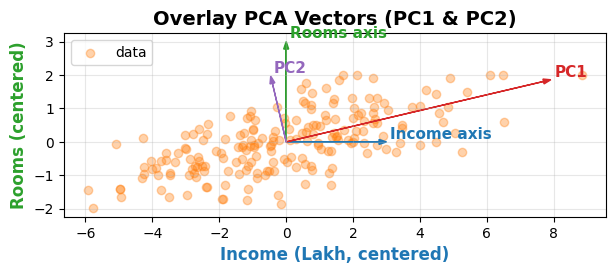

In [ ]:

# Overlay PCA vectors
plt.figure(figsize=(7, 7))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.35, color=c_data, label="data")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Income (Lakh, centered)", color=c_inc, fontsize=12, weight="bold")
plt.ylabel("Rooms (centered)", color=c_room, fontsize=12, weight="bold")
plt.title("Overlay PCA Vectors (PC1 & PC2)", fontsize=14, weight="bold")

# Original axes
draw_arrow(ax, origin, np.array([axis_len, 0.0]), c_inc, "Income axis")
draw_arrow(ax, origin, np.array([0.0, axis_len]), c_room, "Rooms axis")

# PCA vectors scaled by sqrt eigenvalues for visibility
scale_pca = 3.0 * np.sqrt(eigvals)
draw_arrow(ax, origin, u1 * scale_pca[0], c_pc1, "PC1")
draw_arrow(ax, origin, u2 * scale_pca[1], c_pc2, "PC2")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


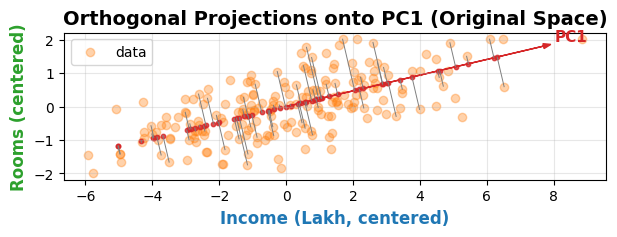

In [ ]:

#  Orthogonal projections onto PC1 (original space)
plt.figure(figsize=(7, 7))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.35, color=c_data, label="data")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Income (Lakh, centered)", color=c_inc, fontsize=12, weight="bold")
plt.ylabel("Rooms (centered)", color=c_room, fontsize=12, weight="bold")
plt.title("Orthogonal Projections onto PC1 (Original Space)", fontsize=14, weight="bold")


draw_arrow(ax, origin, u1 * scale_pca[0], c_pc1, "PC1")
subset_idx = np.linspace(0, n - 1, 60, dtype=int)
for i in subset_idx:
    x0, y0 = X_centered[i]
    xp, yp = X_proj_pc1[i]
    plt.plot([x0, xp], [y0, yp], linewidth=0.7, color=c_proj)
    plt.scatter([xp], [yp], s=10, color=c_pc1, alpha=0.8)

plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

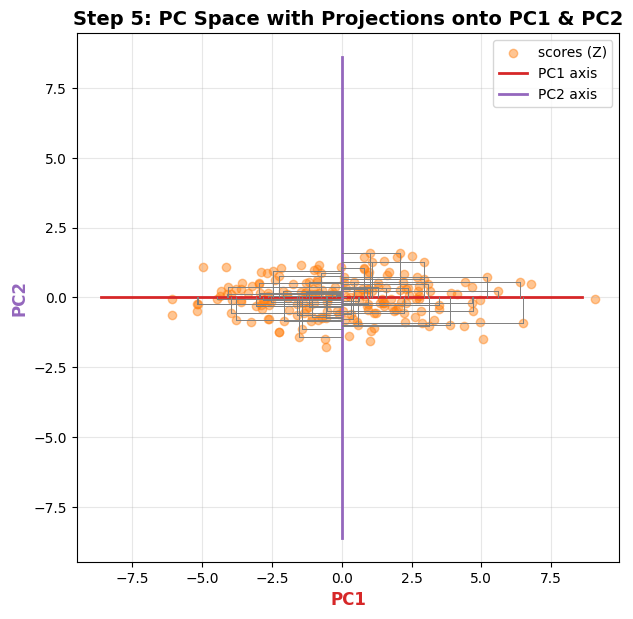

Explained variance ratio (PC1, PC2): [0.9417285 0.0582715]
Eigenvalues: [7.33585761 0.45392213]
Eigenvectors (columns = PCs):
 [[ 0.97349902 -0.22869117]
 [ 0.22869117  0.97349902]]


In [ ]:
# PC space with projections onto PC1 and PC2
plt.figure(figsize=(7, 7))
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.45, color=c_data, label="scores (Z)")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.xlabel("PC1", color=c_pc1, fontsize=12, weight="bold")
plt.ylabel("PC2", color=c_pc2, fontsize=12, weight="bold")
plt.title("Step 5: PC Space with Projections onto PC1 & PC2", fontsize=14, weight="bold")

# Axes in PC space
maxr = np.sqrt((Z**2).sum(axis=1)).max()
L = 0.95 * maxr
ax.plot([-L, L], [0, 0], color=c_pc1, linewidth=2, label="PC1 axis")
ax.plot([0, 0], [-L, L], color=c_pc2, linewidth=2, label="PC2 axis")

# Projections for subset (to avoid clutter)
for i in subset_idx:
    z1, z2 = Z[i]
    ax.plot([z1, z1], [z2, 0], linewidth=0.7, color=c_proj)  # onto PC1
    ax.plot([z1, 0], [z2, z2], linewidth=0.7, color=c_proj)  # onto PC2

plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# ---------- Diagnostics ----------
print("Explained variance ratio (PC1, PC2):", explained_var_ratio)
print("Eigenvalues:", eigvals)
print("Eigenvectors (columns = PCs):\n", eigvecs)

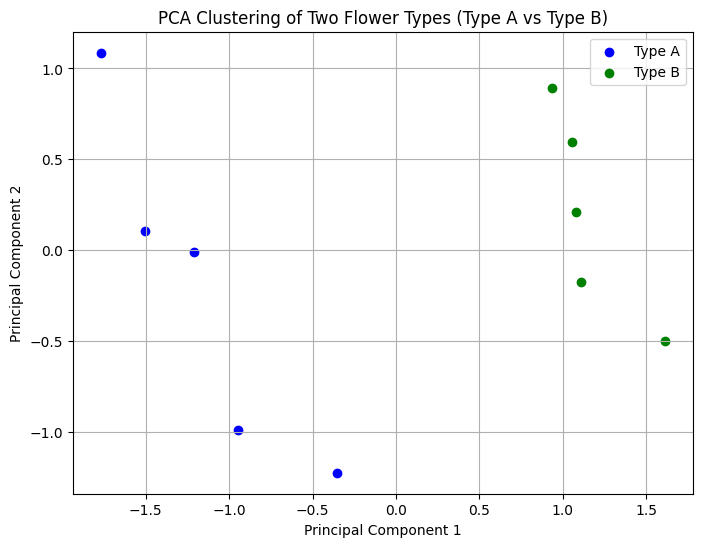

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# flower random data
data = {
    'Flower Type': ['Type A', 'Type A', 'Type A', 'Type A', 'Type A',
                    'Type B', 'Type B', 'Type B', 'Type B', 'Type B'],
    'Sepal Length': [5.1, 4.9, 4.7, 5.0, 5.4, 6.5, 6.7, 6.3, 6.8, 6.4],
    'Sepal Width': [3.5, 3.0, 3.2, 3.6, 3.9, 3.0, 3.1, 2.9, 3.2, 2.7]
}

df = pd.DataFrame(data)


features = ['Sepal Length', 'Sepal Width']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Add PC to dataframe
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plot the PCA result to show clustering
plt.figure(figsize=(8, 6))
for flower_type, color in zip(['Type A', 'Type B'], ['blue', 'green']):
    subset = df[df['Flower Type'] == flower_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=flower_type, color=color)

plt.title('PCA Clustering of Two Flower Types (Type A vs Type B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()



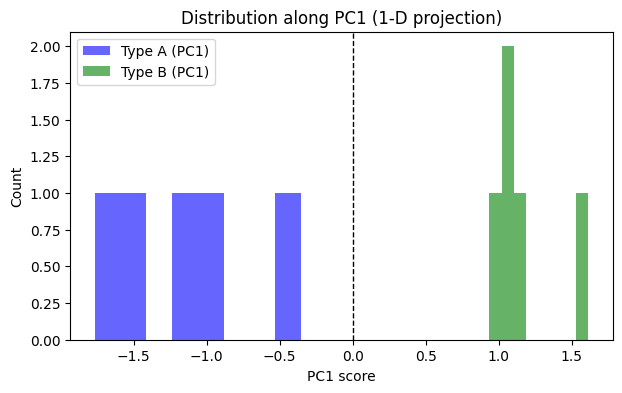

In [ ]:
plt.figure(figsize=(7,4))
bins = 8
for flower_type, color in zip(['Type A', 'Type B'], ['blue', 'green']):
    m = df['Flower Type'] == flower_type
    plt.hist(df.loc[m, 'PC1'], bins=bins, alpha=0.6, label=f"{flower_type} (PC1)", color=color)
plt.axvline(0, ls='--', c='k', lw=1)
plt.title('Distribution along PC1 (1-D projection)')
plt.xlabel('PC1 score'); plt.ylabel('Count'); plt.legend(); plt.show()

Best 1D threshold on PC1: 0.290  | accuracy: 1.000


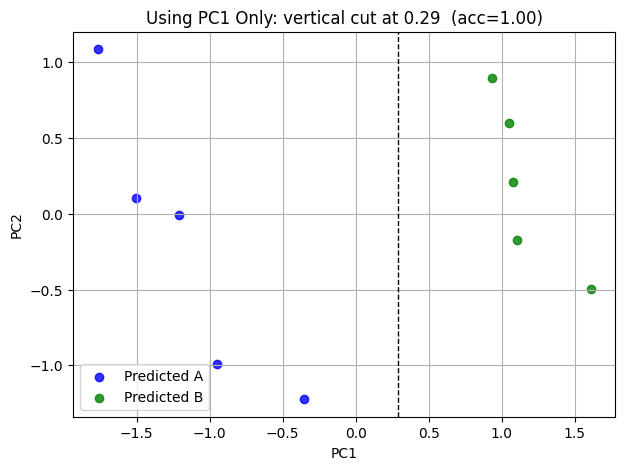

In [ ]:
labels = (df['Flower Type'] == 'Type B').astype(int).values
pc1 = df['PC1'].values
order = np.argsort(pc1)
cand = (pc1[order][1:] + pc1[order][:-1]) / 2  # midpoints

best_acc, best_thr = -1, None
for thr in cand:
    pred = (pc1 >= thr).astype(int)  # right side predicted as Type B
    acc = (pred == labels).mean()
    if acc > best_acc:
        best_acc, best_thr = acc, thr

print(f"Best 1D threshold on PC1: {best_thr:.3f}  | accuracy: {best_acc:.3f}")

# Visualize the decision on PC1–PC2 (for intuition)
plt.figure(figsize=(7,5))
pred = (pc1 >= best_thr).astype(int)
for val, color, name in [(0,'blue','Predicted A'), (1,'green','Predicted B')]:
    m = pred == val
    plt.scatter(df.loc[m,'PC1'], df.loc[m,'PC2'], color=color, alpha=0.8, label=name)
plt.axvline(best_thr, ls='--', c='k', lw=1)
plt.title(f'Using PC1 Only: vertical cut at {best_thr:.2f}  (acc={best_acc:.2f})')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(); plt.grid(True); plt.show()


In [ ]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
#Digits dataset is a grayscale image dataset of handwritten digit having 1797 8×8 images.

digits = load_digits()
data = digits.data
data.shape

(1797, 64)

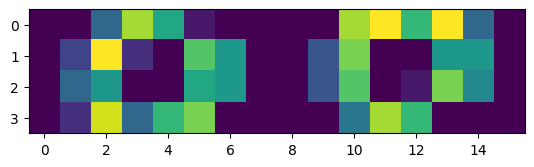

In [ ]:
plt.imshow(data[0,:].reshape(4,16))

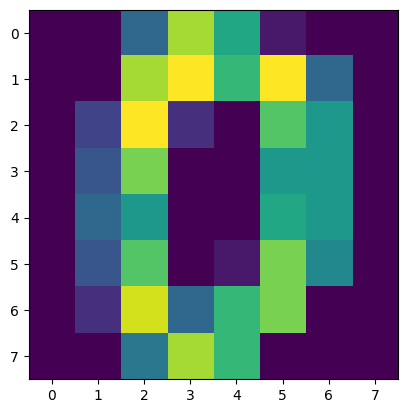

In [ ]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample)

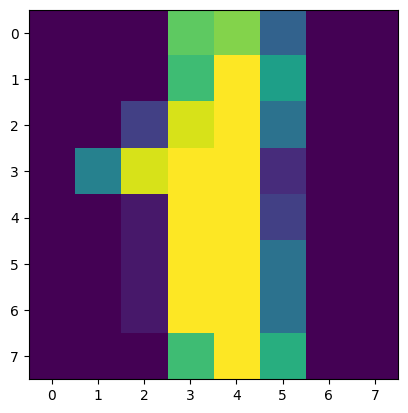

In [ ]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[1,:].reshape(8,8)
plt.imshow(image_sample)

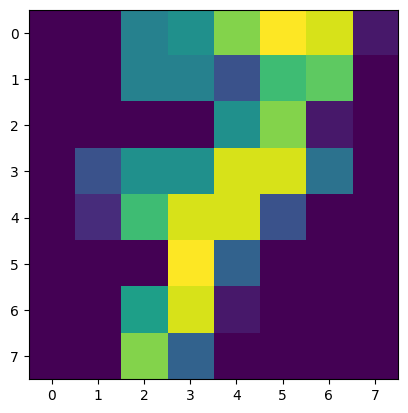

In [ ]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[7,:].reshape(8,8)
plt.imshow(image_sample)

In [ ]:
#Import required modules
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

As seen here that data has been reduced from

The data gets reduced from (1797, 64) to (1797, 2)

<ipython-input-12-9e4f3460097a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-12-9e4f3460097a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


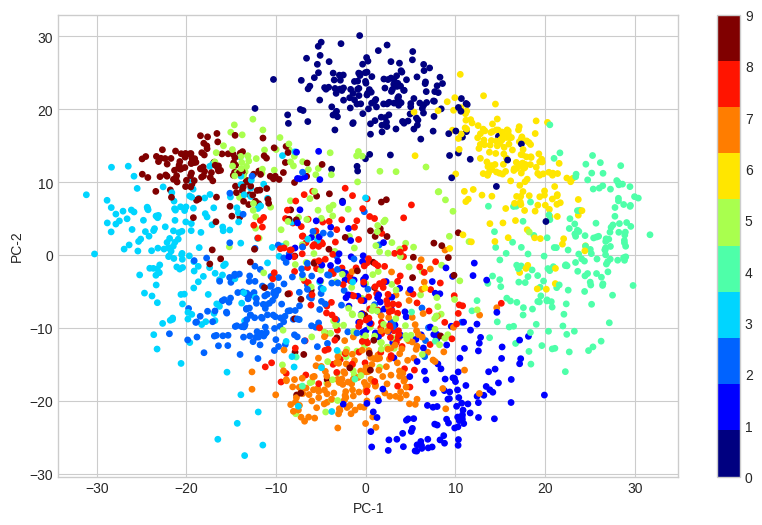

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

PCA for Image compression as we did for SVD


In [ ]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plot
from sklearn.decomposition import PCA

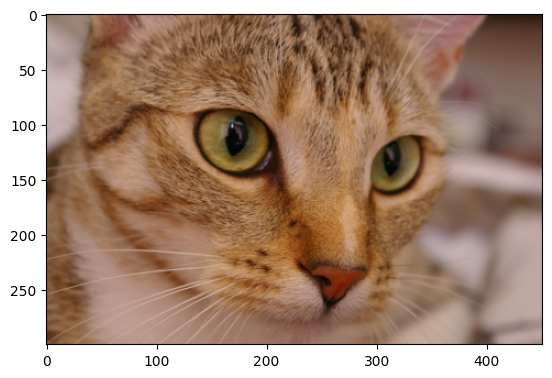

In [ ]:
from skimage import data

thecat = data.chelsea()
plot.imshow(thecat)

In [ ]:
red = thecat[:,:,0]
green = thecat[:,:,1]
blue = thecat[:,:,2]

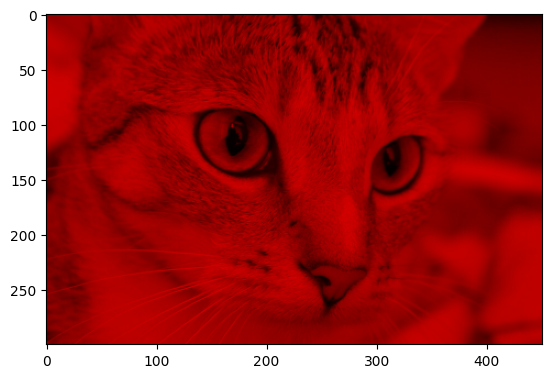

In [ ]:
zeros = np.zeros_like(blue)
red_c = cv2.merge([red,zeros,zeros])
plot.imshow(red_c)

In [ ]:
#initialize PCA with first 20 principal components
pca = PCA(20)

red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

Inverse Transformation: **pca.inverse_transform** is used to reverse. It takes the data that has been projected onto the lower-dimensional space (e.g., a reduced set of principal components) and reconstructs an approximation of the original data in the original feature space.
* The inverse transformation involves multiplying the projected data by the transpose of the principal components and adding back the mean that was subtracted during the initial centering step.

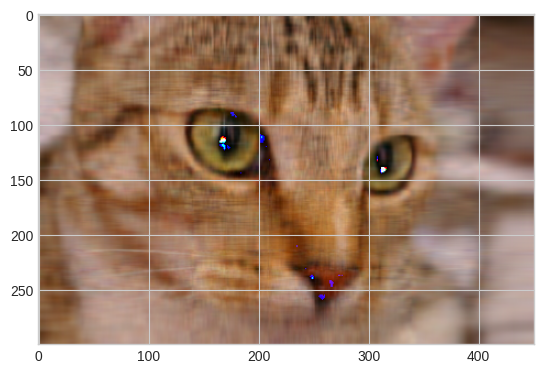

In [ ]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

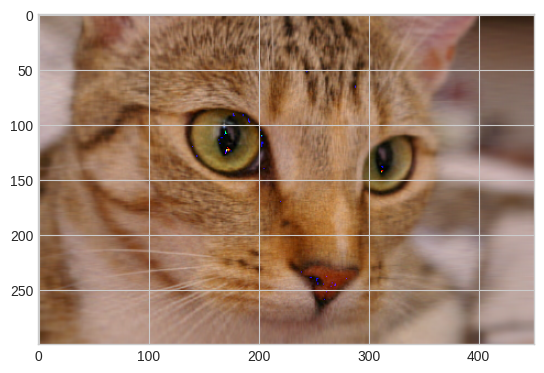

In [ ]:
#initialize PCA with first 50 principal components
pca = PCA(50)


red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)


green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

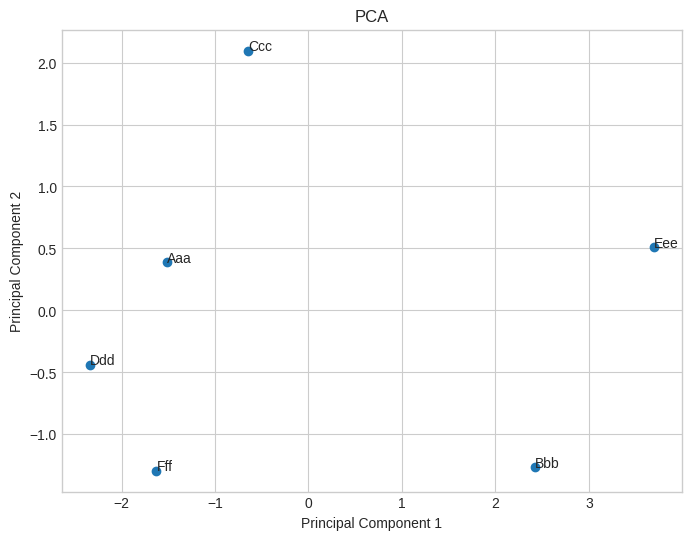


 Politician Data:
            PSS  PK  PAR  Integrity  YoE  SMI  Debate
Politician                                           
Aaa           8   7   85          9   10    7       8
Bbb           6   9   70          5   20    6       7
Ccc           7   6   75          8   12    9       6
Ddd           9   7   90          8    8    8       9
Eee           5   8   65          6   25    4       5
Fff          10   8   90          7   10    8       8

 PCA Results:
                 PC1       PC2
Politician                    
Aaa        -1.511696  0.391464
Bbb         2.425327 -1.263898
Ccc        -0.641790  2.096738
Ddd        -2.337666 -0.438214
Eee         3.692515  0.507535
Fff        -1.626690 -1.293625

 Explained Variance by Principal Components:
[0.72201914 0.19690672]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#  Dataset of politicians with 7 features
data = {
    'Politician': ['Aaa', 'Bbb', 'Ccc', 'Ddd', 'Eee','Fff'],
    'PSS': [8, 6, 7, 9, 5,10],
    'PK': [7, 9, 6, 7, 8,8],
    'PAR': [85, 70, 75, 90, 65,90],
    'Integrity': [9, 5, 8, 8, 6,7],
    'YoE': [10, 20, 12, 8, 25,10],
    'SMI': [7, 6, 9, 8, 4,8],
    'Debate': [8, 7, 6, 9, 5,8]
}

#YoE : Year of Experience
#PSS: Public speaking Skill
#PK : Policy KNowledge
#PAR: Public Approval Rating
#SMI: Social Media INfluence
# Pandas
df = pd.DataFrame(data)
df.set_index('Politician', inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA and reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame to display the results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=df.index)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Label points with politician names
for politician in pca_df.index:
    plt.annotate(politician, (pca_df.loc[politician, 'PC1'], pca_df.loc[politician, 'PC2']))

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("\n Politician Data:")
print(df)

print("\n PCA Results:")
print(pca_df)

print("\n Explained Variance by Principal Components:")
print(explained_variance)


In [ ]:
# After applying PCA, we can access the components (loadings)
loadings = pca.components_

# Create a DataFrame to display loadings for PC1 and PC2
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=df.columns)
print("\nPCA Loadings:")
print(loadings_df)



PCA Loadings:
                PC1       PC2
PSS       -0.403122 -0.291493
PK         0.260327 -0.683332
PAR       -0.417986 -0.258088
Integrity -0.356977  0.401501
YoE        0.443371  0.000861
SMI       -0.378650  0.163120
Debate    -0.357246 -0.440077


PC1:

-   Years of Experience (0.44) has the largest positive contribution to PC1.
-   Public Approval (-0.42) has a negative contribution, but it still influences PC1.

> The negative sign indicates that increases in Public Approval associated with decreases in PC1.


PC2:

-    Integrity (0.44) has the largest positive contributions to PC2.
-    Policy_Knowledge (0.68) contributes negatively to PC2, but its negative effect larger to PC2.

**A negative loading is not inherently less influential than a positive loading.**

* It just indicates an inverse relationship.

* The magnitude of the loading (regardless of the sign) is what determines how much a feature contributes to the principal component.

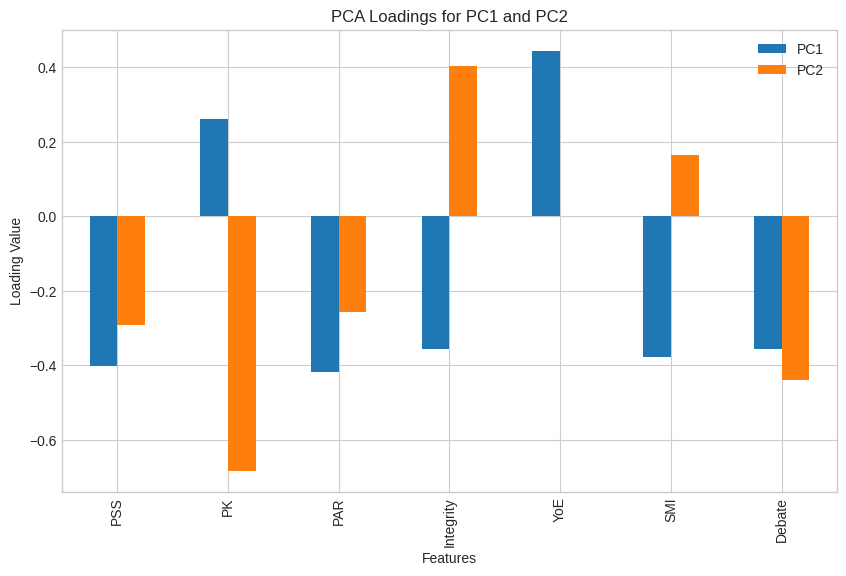

In [ ]:
# Plotting loadings for PC1 and PC2
loadings_df.plot(kind='bar', figsize=(10, 6))
plt.title('PCA Loadings for PC1 and PC2')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.grid(True)
plt.show()